## DATA ANALYTICS ON HOUSE PRICING IN NIGERIA

#### This data is gotten from kaggle

#### This is a mini data entry analysis on the housing prices in different states of Nigeria.

.

###### Load in required libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
housing = pd.read_csv('datasets/nigeria_houses_data.csv')

In [3]:
#take a summary and descriptive statistics of the data
housing.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
housing.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0
24325,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0


In [5]:
housing.shape

(24326, 8)

###### close to 2500 rows and 8 columns

#### Data Cleaning

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.2+ MB


###### No null values

In [7]:
housing.state.unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [8]:
housing.state.nunique()

25

In [9]:
len(str(int(housing.price.max()))) - 2

11

In [10]:
housing[housing['price']== housing.price.max()]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
4096,7,7,8,8,Detached Duplex,Ikoyi,Lagos,1.800000e+12


##### This money is too expensive to be for a house it must be an outlier

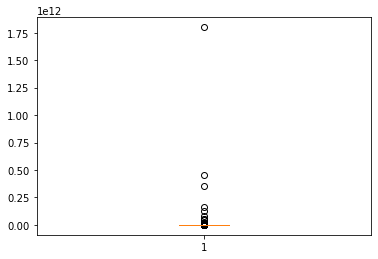

In [11]:
plt.boxplot(housing.price);

In [12]:
housing = housing.drop(index=4096, axis=0)

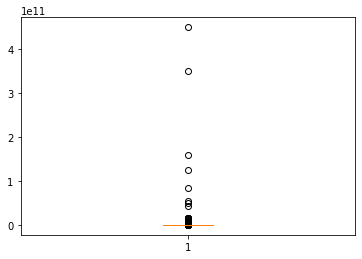

In [13]:
plt.boxplot(housing.price);

In [14]:
housing.price.max()

450000000000.0

###### we can take out these two outliers and work with the rest

In [15]:
housing = housing[housing['price']<housing.price.nlargest(2).tolist()[1]]

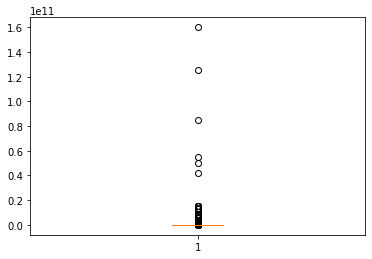

In [16]:
plt.boxplot(housing.price);

###### The data is now fit to use

#### Data Exploration

In [17]:
housing[housing['price']>housing.price.nlargest(40).tolist()[39]][['state', 'price']]

,state,price
504,Lagos,1.500000e+10
1000,Abuja,4.000000e+09
2358,Abuja,1.500000e+10
2570,Lagos,1.400000e+10
2925,Abuja,3.500000e+09
4327,Lagos,1.600000e+11
5319,Lagos,3.900000e+09
5488,Abuja,4.000000e+09
6083,Lagos,6.000000e+09
6942,Abuja,4.000000e+09


###### Seems Lagos and Abuja has the highest amounts of housing prices

###### lets see some relationships between variables like bathrooms, bedrooms etc with the price

In [18]:
features = housing[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price', 'title']]

<Figure size 360x360 with 0 Axes>

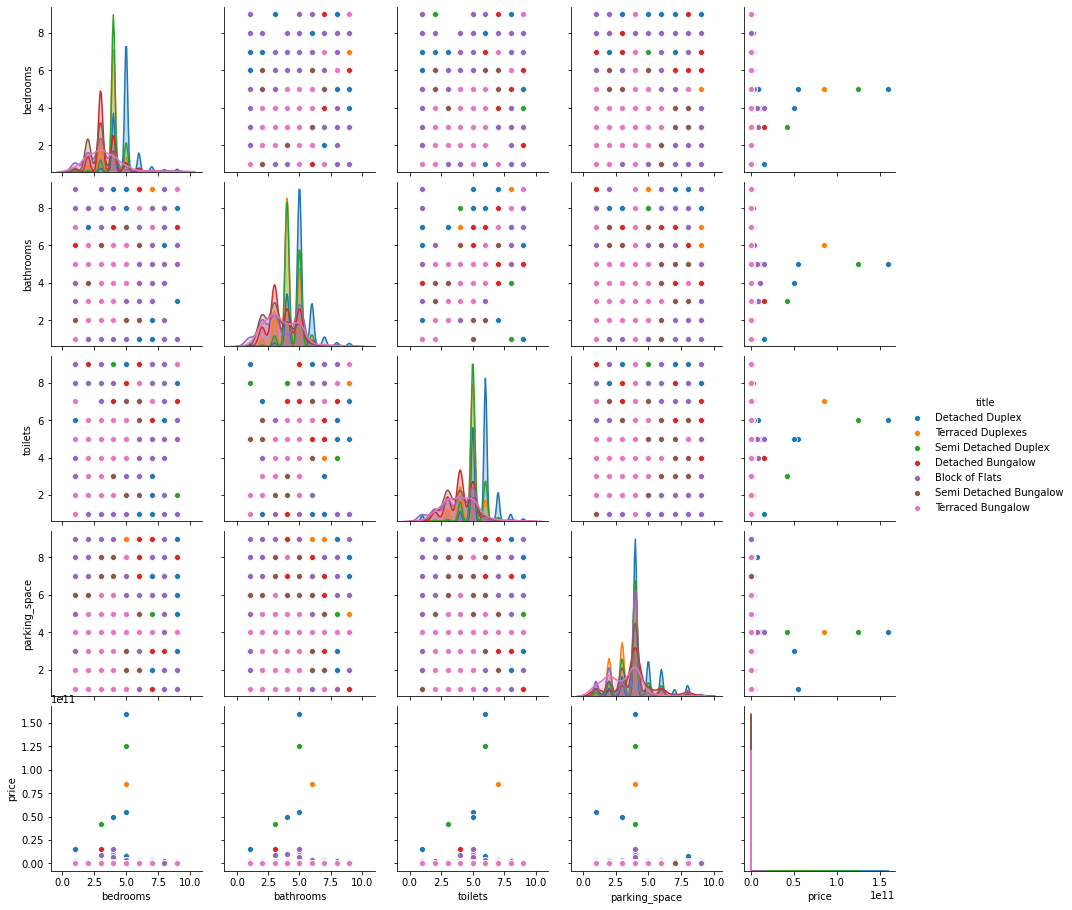

In [19]:
plt.figure(figsize=(5, 5))
sns.pairplot(features, hue='title')

###### there is a very weak positive correlation between these features and price

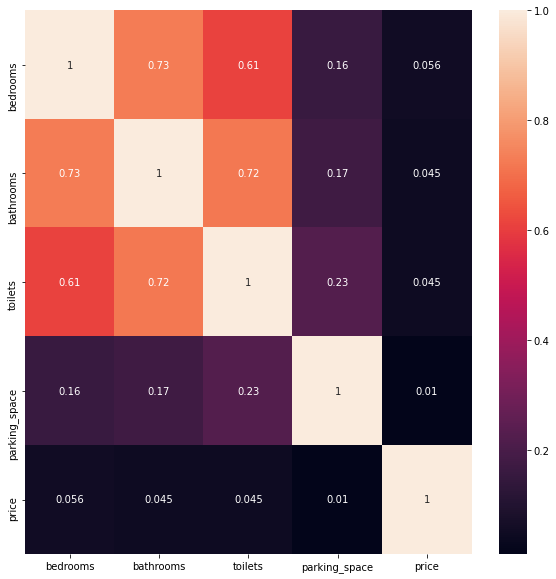

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True)

###### There doesn't seem to be much corrrelation with these features and price

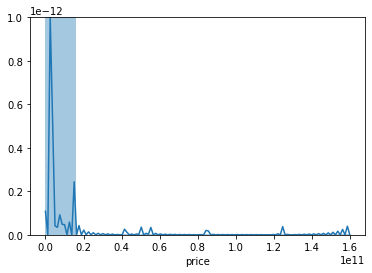

In [21]:
sns.distplot(features.price, bins=10 )

#### let's look at housing pricing by towns in different states

###### we will focus on lagos, Abuja and Rivers

In [51]:
#a function to plot a barplot of town houses.
def plotter(state, data):
    state_data =housing[housing['state']== state]
    #if the towns are too many, we select first 6 and plot them
    if len(state_data.town.unique().tolist()) > 6:
        towns_filtered = state_data.town.unique().tolist()[:7]
        state_data = state_data[state_data['town'].isin(towns_filtered)]
    plt.figure(figsize=(15,10))
    sns.barplot(y='price', x='town',hue='title', data=state_data)

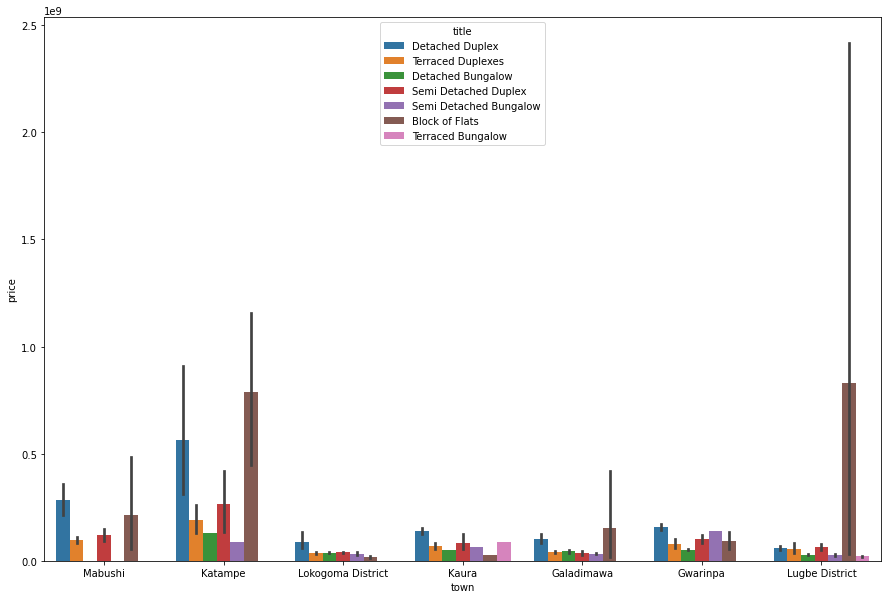

In [52]:
plotter('Abuja', housing)

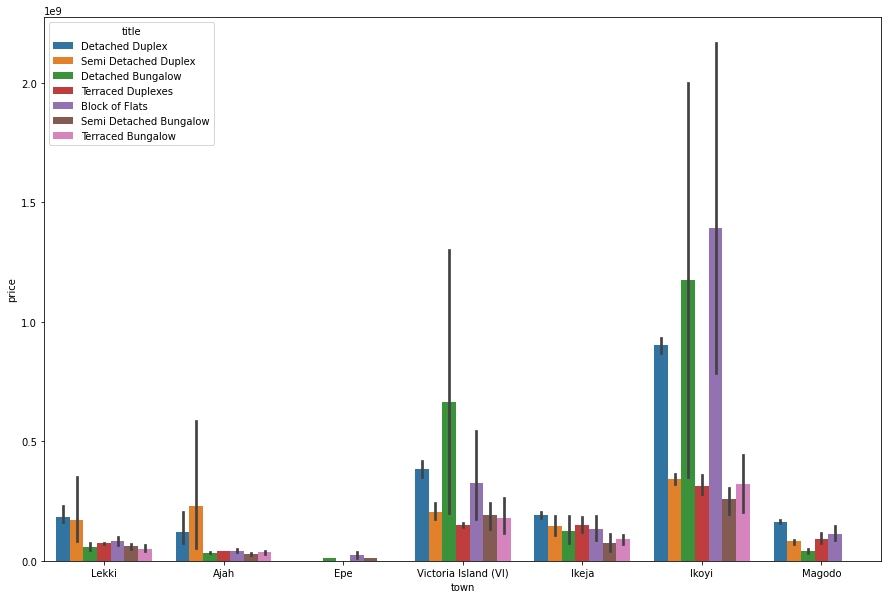

In [53]:
plotter('Lagos', housing)

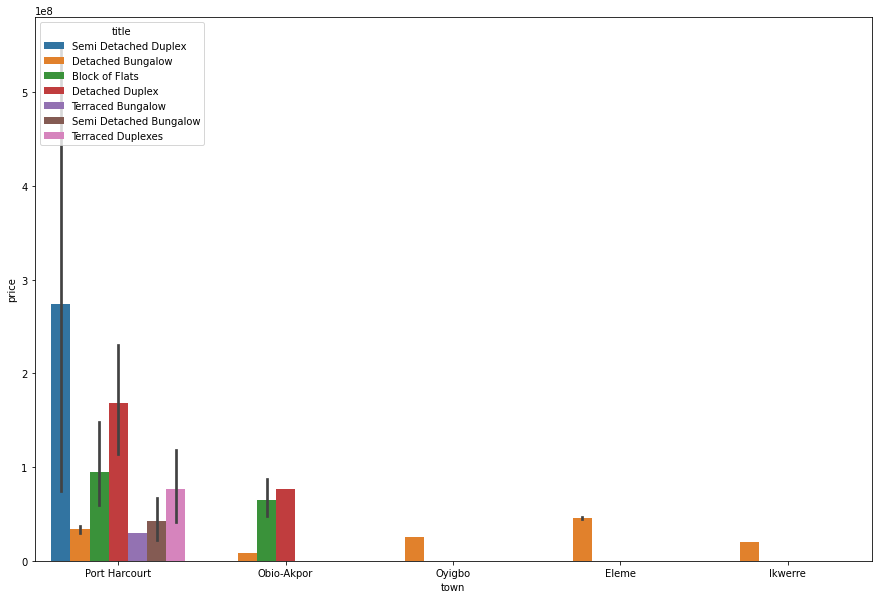

In [54]:
plotter('Rivers', housing)

##### In these three cases, the town is a very large determinant of the price of houses.

## In Conclusion

#### From the dataset provided, the towns were larger determinant of the price of houses.

#### Places like lagos, Abuja, Rivers had large amount of money for its houses and it could probably be because of commerciality or the state is very developed

#### within these three mentioned state, for example, lagos; towns like victoria island, ikoyi seems to be an expensive place to live in. same goes with Rivers with places like Port Harcourt being very expensive to live in.